<a href="https://colab.research.google.com/github/mdmarghe/DeepLearning/blob/main/MoviesBinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dati
I dati del DB IMDB sono già inclusi nella libreria keras


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #andiamo a considerare solo le 10000 parole più ricorrenti nelle rcensioni dei film


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
test_labels.shape


(25000,)

In [4]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]


np.int64(1)

Siccome ci siamo limitati a 10000 parole, ogni train_data[i] sarà un insieme di numeri che arrivano fino a 9999
    

In [6]:
max([max(sequence) for sequence in train_data])

9999


Come decodificare le recensioni?


In [7]:
word_index= imdb.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])
decoded_review= ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



i-3 perchè 0,1,2, sono riservati a padding, start of sequence e unknown


In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

##Preparazione Dati
Ogni recensione ha un numero di parole diverso
Le reti neurali non prendono in input interi ma tensori


In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        #1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          #2
    return results

x_train = vectorize_sequences(train_data)                  #3
x_test = vectorize_sequences(test_data)                    #4

#1 - Creates an all-zero matrix of shape (len(sequences), dimension)
#2 - Sets specific indices of results[i] to 1s
#3 - Vectorized training data
#4 - Vectorized test data


In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
#Vettorizziamo anche le etichette
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [12]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

#Creazione della rete
Layer Dense

Quanti layer usare

Quante unità nascoste per layer

Funzione di attivazione

Funzione obiettivo

Ottimizzatore



In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

compiliamo il modello


In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

compilazione con configurazione dell'ottimizzatore



In [15]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Se voglio configurare anche la perdita e le metriche


In [16]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#Convalida dell'approccio

Creazione set di convalida con 10k campioni


In [17]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]


Addestramento del modello
20 epoche
su mini batch da 512 campioni
valida l'approccio con i 10000 valori di convalida

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - acc: 0.5421 - loss: 0.6695 - val_acc: 0.7303 - val_loss: 0.5719
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.8001 - loss: 0.5366 - val_acc: 0.8344 - val_loss: 0.4685
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.8911 - loss: 0.4125 - val_acc: 0.8802 - val_loss: 0.3784
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.9186 - loss: 0.3071 - val_acc: 0.8873 - val_loss: 0.3156
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - acc: 0.9341 - loss: 0.2316 - val_acc: 0.8827 - val_loss: 0.3046
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - acc: 0.9509 - loss: 0.1842 - val_acc: 0.8854 - val_loss: 0.2882
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9576 - loss: 0.1598 - val_acc: 0.8877 - val_loss: 0.2876
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.9667 - loss: 0.1306 - val_acc: 0.8859 - val_loss: 0.2950
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - acc: 0.970

Notiamo che il model.fit è un oggetto del tipo History.
Questo tipo di oggetto contiene un dizionario con ciò che è successo durante l'allenamento


In [19]:
type(history)


keras.src.callbacks.history.History

In [20]:
history_dict=history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

Tracciamo i valori contenuti nel dizionario della History con Matplotlib

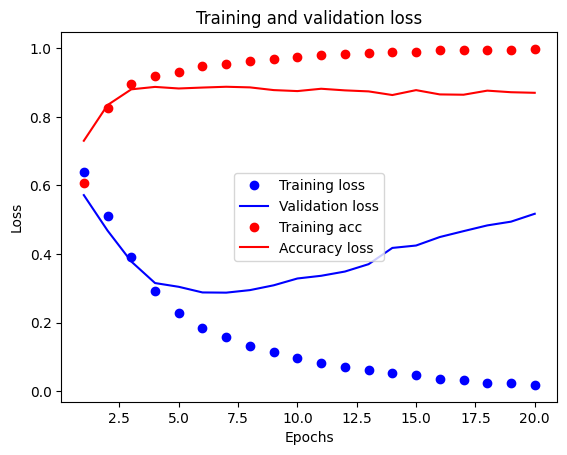

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           #1
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      #2
plt.plot(epochs, acc_values, 'ro', label='Training acc')           #3
plt.plot(epochs, val_acc_values, 'r', label='Accuracy loss')      #4
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#1 - “bo” is for “blue dot.”
#2 - “b” is for “solid blue line.”


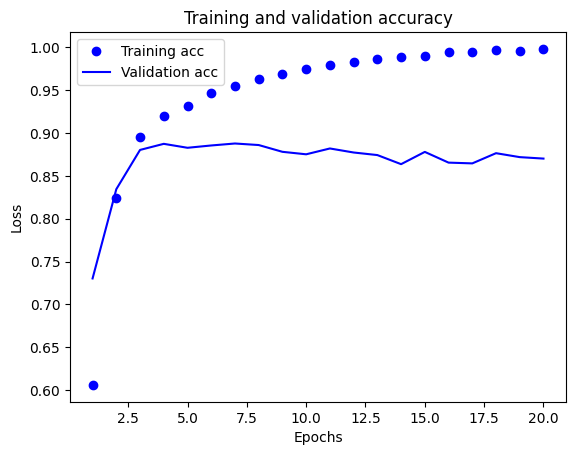

In [22]:
plt.clf()                                      #1

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#1 - Clears the figure


Modello overfittato, proviamo a ritreinare diversamente
  

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history=model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9447 - loss: 0.1596
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9539 - loss: 0.1369
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9597 - loss: 0.1236
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9653 - loss: 0.1107
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8683 - loss: 0.3654


In [40]:
results
history_dict.keys()

dict_keys(['accuracy', 'loss'])

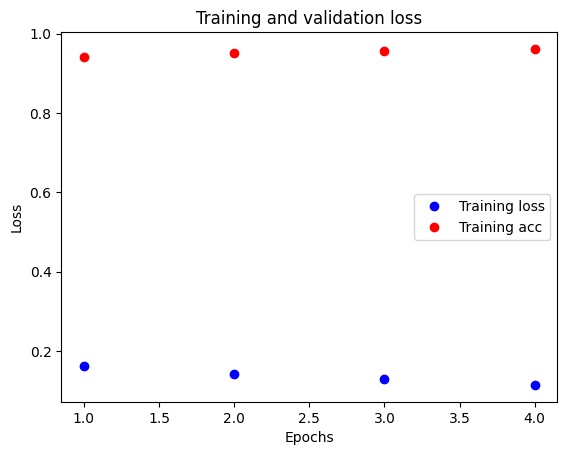

In [42]:
history_dict = history.history
loss_values = history_dict['loss']
#val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
#val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           #1
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      #2
plt.plot(epochs, acc_values, 'ro', label='Training acc')           #3
#plt.plot(epochs, val_acc_values, 'r', label='Accuracy loss')      #4
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Predizione su nuovi dati


In [43]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.11720286],
       [0.9999371 ],
       [0.29723167],
       ...,
       [0.05608561],
       [0.0170987 ],
       [0.6451017 ]], dtype=float32)